# Part 3: Modeling Data

In [1]:
import numpy as np
import pandas as pd

import sklearn.model_selection as ms
import sklearn.metrics as mx
import sklearn.ensemble as en

import imblearn.ensemble as imbn

import matplotlib.pyplot as plt
import seaborn as sns

import project_functions2 as pf

df = pd.read_csv('scrubbed_data.csv') 
df = pd.concat([df.drop('NTA', axis=1), pd.get_dummies(df.NTA)], axis=1) # adding NTA as encoded feature

df = df.fillna(0)
df = df.drop(['city', 'zip_code', 'display_address', 'address1', 
              'neighborhood_by_zip'], axis=1) # I might want to use this data later.

In [2]:
X = df.drop('above_avg', axis=1)
y = df.above_avg

## 1. Choosing a Model
To choose a model, I'm going to look at a basic model with Train, Test, Split, then I'll run the same model using cross validation. For my cross validation, I'm chosing a stratified K-Fold to try to mitigate the class imbalance. I'll stick with the default number of splits (5) for now.

The classifiers I chose are from sklearn.ensemble and imblearn.ensemble. They were chosen because they are appropriate for data that is not necessarily normal, and data that is imbalanced.

The metric for success will primarily be precision and f1-score, although the other scores will be considered as well. I chose precision because precision tends to involve direct costs; the more false positives you have, the more cost per true positive you have. Recall, on the other had, tends to involve opportunity costs; you are giving up opportunities every time you have a false negative. So recall is least important when the marginal value of additional correct identification is small, e.g. there are multiple opportunities, there is little different between them, and only a limited number can be pursued. In the case of trying to build a great restaurant, false positives can lead to wasting resources, while false negatives simply limit the scope of options.

In [3]:
cv = ms.StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [4]:
clf1 = en.RandomForestClassifier(n_estimators=200)
clf2 = en.RandomForestClassifier(n_estimators=200, class_weight='balanced')
clf3 = en.RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample')
clf4 = imbn.BalancedRandomForestClassifier()
clf5 = imbn.BalancedBaggingClassifier()
clf6 = imbn.EasyEnsembleClassifier()

clf7 = en.RandomForestClassifier(n_estimators=200) # smote model

In [5]:
classifiers = [clf1, clf2, clf3, clf4, clf5, clf6]


Basic Model with Train, Test, Split for: RandomForestClassifier(n_estimators=200) 

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       388
           1       0.56      0.24      0.33       119

    accuracy                           0.78       507
   macro avg       0.68      0.59      0.60       507
weighted avg       0.74      0.78      0.74       507



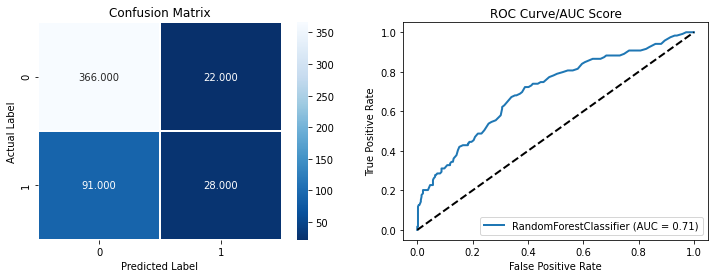


Cross Validation Model with Repeated Stratified K-Fold for: RandomForestClassifier(n_estimators=200) 



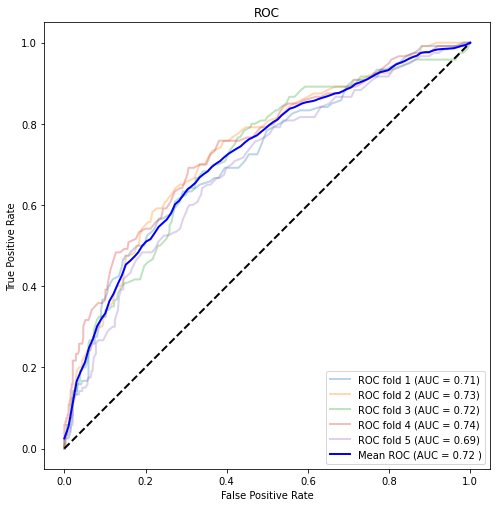


Scores for: RandomForestClassifier(n_estimators=200)


,Accuracy,AUC,Precision,Recall,F1
0,0.747036,0.702094,0.452381,0.191667,0.247059
1,0.773176,0.698848,0.500000,0.208333,0.323699
2,0.772727,0.725648,0.576923,0.241667,0.341176
3,0.783037,0.739363,0.577778,0.208333,0.292683
4,0.792490,0.729685,0.696970,0.183333,0.301887
mean,0.773693,0.719127,0.560810,0.206667,0.301301



Basic Model with Train, Test, Split for: RandomForestClassifier(class_weight='balanced', n_estimators=200) 

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       388
           1       0.69      0.21      0.32       119

    accuracy                           0.79       507
   macro avg       0.75      0.59      0.60       507
weighted avg       0.78      0.79      0.75       507



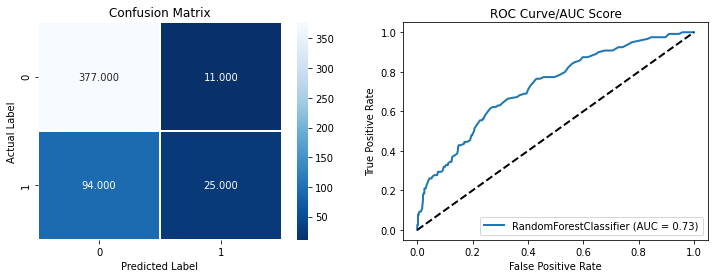


Cross Validation Model with Repeated Stratified K-Fold for: RandomForestClassifier(class_weight='balanced', n_estimators=200) 



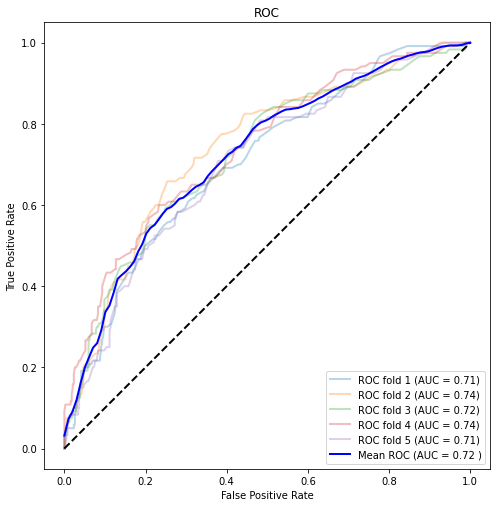


Scores for: RandomForestClassifier(class_weight='balanced', n_estimators=200)


,Accuracy,AUC,Precision,Recall,F1
0,0.750988,0.706509,0.409091,0.183333,0.273810
1,0.761341,0.701421,0.480000,0.208333,0.315789
2,0.773176,0.731492,0.500000,0.183333,0.282209
3,0.772727,0.713644,0.562500,0.208333,0.306748
4,0.784585,0.738601,0.694444,0.208333,0.335404
mean,0.768563,0.718334,0.529207,0.198333,0.302792



Basic Model with Train, Test, Split for: RandomForestClassifier(class_weight='balanced_subsample', n_estimators=200) 

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       388
           1       0.67      0.22      0.33       119

    accuracy                           0.79       507
   macro avg       0.73      0.59      0.60       507
weighted avg       0.77      0.79      0.75       507



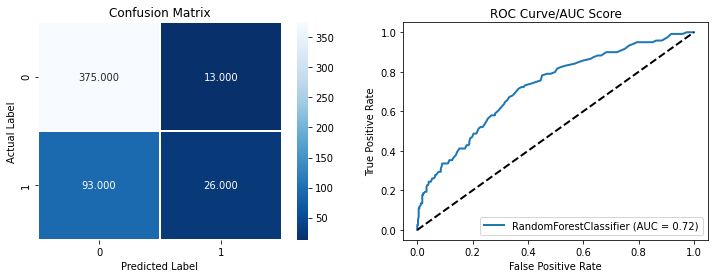


Cross Validation Model with Repeated Stratified K-Fold for: RandomForestClassifier(class_weight='balanced_subsample', n_estimators=200) 



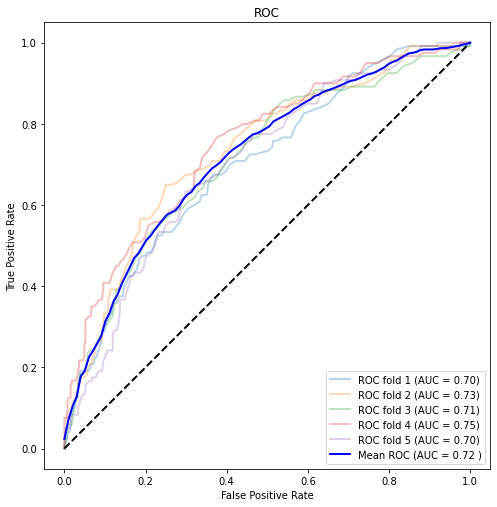


Scores for: RandomForestClassifier(class_weight='balanced_subsample', n_estimators=200)


,Accuracy,AUC,Precision,Recall,F1
0,0.750988,0.700227,0.413043,0.175000,0.224852
1,0.759369,0.695629,0.462963,0.225000,0.329545
2,0.777120,0.745704,0.550000,0.175000,0.269939
3,0.772727,0.720898,0.600000,0.225000,0.292683
4,0.792490,0.737543,0.634146,0.233333,0.300000
mean,0.770539,0.720000,0.532031,0.206667,0.283404



Basic Model with Train, Test, Split for: BalancedRandomForestClassifier() 

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       388
           1       0.38      0.60      0.47       119

    accuracy                           0.68       507
   macro avg       0.62      0.65      0.62       507
weighted avg       0.74      0.68      0.70       507



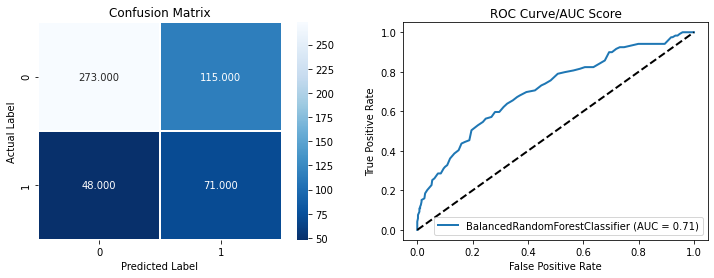


Cross Validation Model with Repeated Stratified K-Fold for: BalancedRandomForestClassifier() 



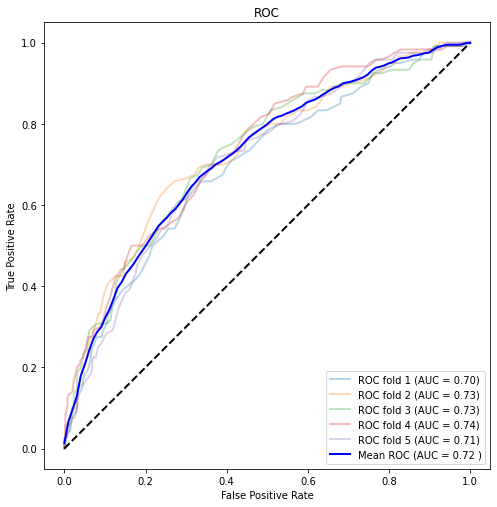


Scores for: BalancedRandomForestClassifier()


,Accuracy,AUC,Precision,Recall,F1
0,0.662722,0.695370,0.365854,0.616667,0.462500
1,0.652174,0.691246,0.368159,0.683333,0.474164
2,0.677866,0.733797,0.392523,0.658333,0.462006
3,0.681818,0.761669,0.394231,0.675000,0.500000
4,0.696252,0.750603,0.409326,0.691667,0.522581
mean,0.674166,0.726537,0.386019,0.665000,0.484250



Basic Model with Train, Test, Split for: BalancedBaggingClassifier() 

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       388
           1       0.40      0.41      0.41       119

    accuracy                           0.72       507
   macro avg       0.61      0.61      0.61       507
weighted avg       0.72      0.72      0.72       507



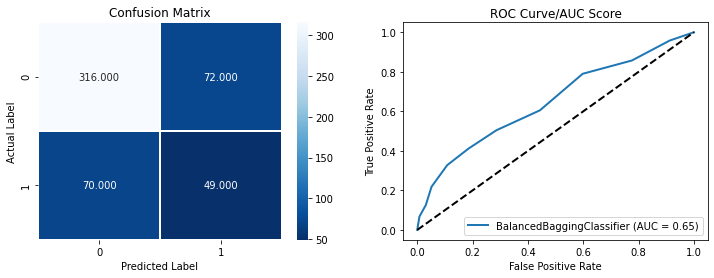


Cross Validation Model with Repeated Stratified K-Fold for: BalancedBaggingClassifier() 



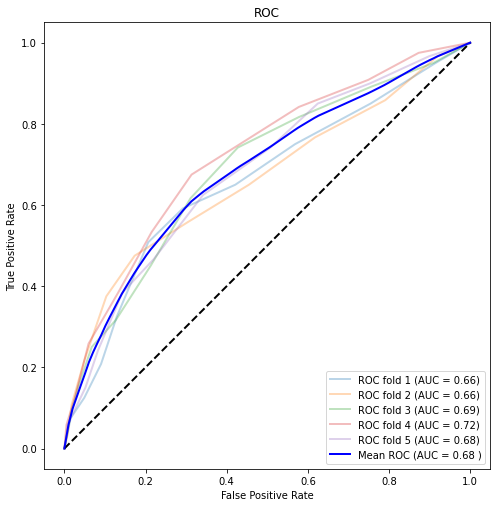


Scores for: BalancedBaggingClassifier()


,Accuracy,AUC,Precision,Recall,F1
0,0.711462,0.673705,0.374233,0.441667,0.431373
1,0.735178,0.735330,0.378378,0.441667,0.437247
2,0.710059,0.658570,0.382550,0.475000,0.400000
3,0.671937,0.669085,0.390071,0.458333,0.439560
4,0.712032,0.662705,0.472868,0.458333,0.479087
mean,0.708134,0.679879,0.399620,0.455000,0.437453



Basic Model with Train, Test, Split for: EasyEnsembleClassifier() 

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       388
           1       0.39      0.62      0.48       119

    accuracy                           0.68       507
   macro avg       0.62      0.66      0.63       507
weighted avg       0.75      0.68      0.70       507



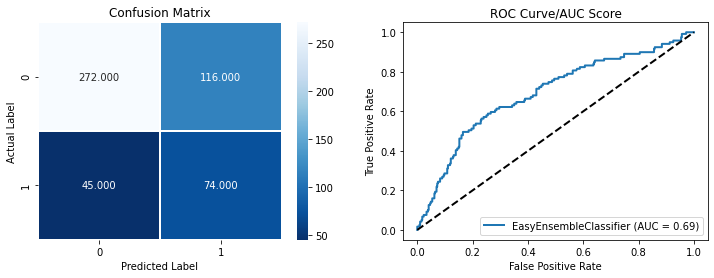


Cross Validation Model with Repeated Stratified K-Fold for: EasyEnsembleClassifier() 



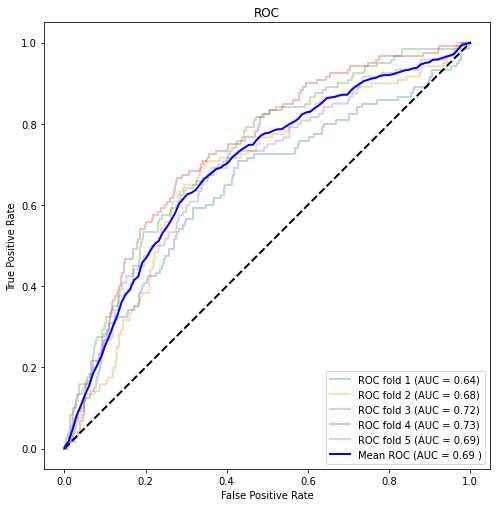


Scores for: EasyEnsembleClassifier()


,Accuracy,AUC,Precision,Recall,F1
0,0.637081,0.624602,0.328767,0.633333,0.437126
1,0.666008,0.657146,0.362745,0.583333,0.483180
2,0.670611,0.687188,0.372093,0.666667,0.495627
3,0.671937,0.716904,0.386473,0.666667,0.487654
4,0.662055,0.721459,0.414286,0.708333,0.518519
mean,0.661538,0.681460,0.372873,0.651667,0.484421


In [6]:
model_scores = pd.DataFrame()
num = 1

for clf in classifiers:
    pf.base_model(clf, X, y, 0.2, 42)
    pf.run_cross_val_model(clf, X, y, cv)
    scores = pf.cv_model_scores(clf, X, y, cv, num)
    model_scores = pd.concat([model_scores, scores], axis=1)
    num += 1

Our final model includes SMOTE() from imblearn.over_sampling. Since this requires slightly different preprocessing, we can handle it seperately. 


Basic Model with Train, Test, Split with SMOTE for: RandomForestClassifier(n_estimators=200) 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       388
           1       0.46      0.39      0.43       119

    accuracy                           0.75       507
   macro avg       0.64      0.63      0.63       507
weighted avg       0.74      0.75      0.74       507

0.7495069033530573


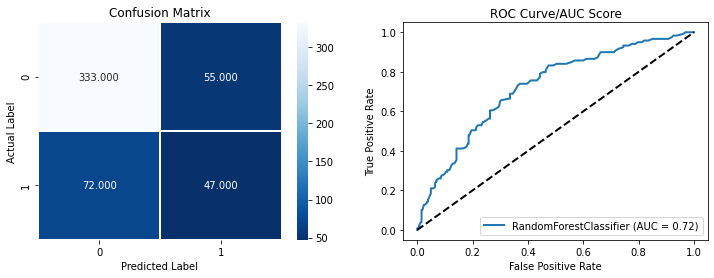


Cross Validation Model with Repeated Stratified K-Fold and SMOTE for: RandomForestClassifier(n_estimators=200) 



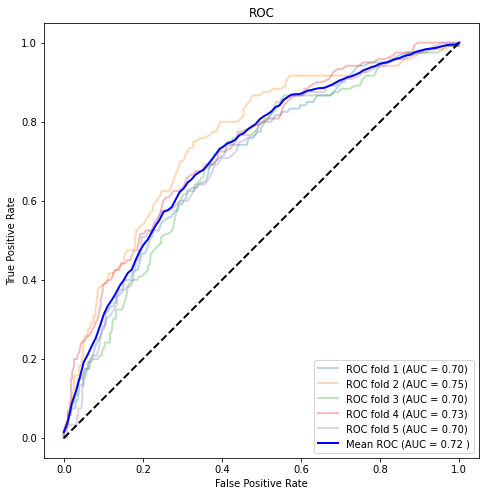


Scores for: RandomForestClassifier(n_estimators=200)


,Accuracy,AUC,Precision,Recall,F1
0,0.750988,0.701781,0.489362,0.191667,0.251497
1,0.767258,0.708602,0.545455,0.208333,0.295858
2,0.777120,0.739093,0.555556,0.216667,0.262500
3,0.766798,0.720423,0.560000,0.216667,0.329268
4,0.792490,0.744581,0.694444,0.208333,0.316456
mean,0.770931,0.722896,0.568963,0.208333,0.291116


In [7]:
import imblearn.over_sampling as imbos

pf.base_model_smote(clf7, X, y, 0.2, 42)
pf.run_cross_val_model_smote(clf7, X, y, cv)
scores = pf.cv_model_scores(clf7, X, y, cv, num)
model_scores = pd.concat([model_scores, scores], axis=1)
num += 1

Now we can look at all the model scores in aggregate.

In [8]:
model_scores_trans = model_scores.T
model_scores_trans

,Accuracy,AUC,Precision,Recall,F1
Model 1,0.777643,0.716470,0.543744,0.211667,0.304341
Model 2,0.768166,0.717789,0.532313,0.193333,0.293953
Model 3,0.767778,0.718540,0.541003,0.200000,0.277372
Model 4,0.682454,0.725938,0.382426,0.651667,0.481173
Model 5,0.717614,0.696272,0.397456,0.496667,0.423294
Model 6,0.665105,0.683109,0.380535,0.636667,0.478021
Model 7,0.774883,0.721258,0.559829,0.201667,0.301789


Building on our best model, we can try RandomSearchCV to tune the hyper parameters to see if it improves our scores. To make it computationally less expensive, I decided to strategically choose the params to search. I listed my reasons below

In [9]:
clf8 = en.RandomForestClassifier(random_state=42)
cv = ms.StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

params = {'n_estimators': [300, 400, 500, 600],
            'max_features': ['sqrt', 'auto', 20, 40, 60],
            'max_depth': [4, 8, 12, 14, 16],
            'min_samples_leaf': [2, 4, 6],
            'bootstrap': [True, False],
            'criterion': ['gini', 'entropy'],
            'class_weight': ['balanced', 'balanced_subsample', None]}

random_search = ms.RandomizedSearchCV(clf8, params, cv=cv)
random_search.fit(X, y)

print('Best Accuracy Score from Randomized Search: ', random_search.score(X, y))
print('Randomized Search Best Parameters:')
print(random_search.best_params_)

Best Accuracy Score from Randomized Search:  0.8562401263823065
Randomized Search Best Parameters:
{'n_estimators': 500, 'min_samples_leaf': 6, 'max_features': 40, 'max_depth': 14, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}


In [10]:
clf8 = en.RandomForestClassifier(random_state=42, **random_search.best_params_)


Basic Model with Train, Test, Split for: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14,
                       max_features=40, min_samples_leaf=6, n_estimators=500,
                       random_state=42) 

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       388
           1       0.57      0.19      0.29       119

    accuracy                           0.78       507
   macro avg       0.68      0.57      0.58       507
weighted avg       0.74      0.78      0.73       507



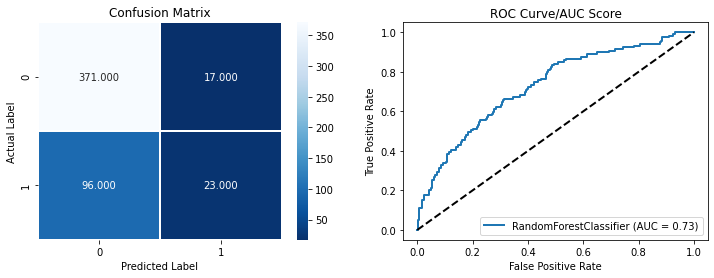


Cross Validation Model with Repeated Stratified K-Fold for: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14,
                       max_features=40, min_samples_leaf=6, n_estimators=500,
                       random_state=42) 



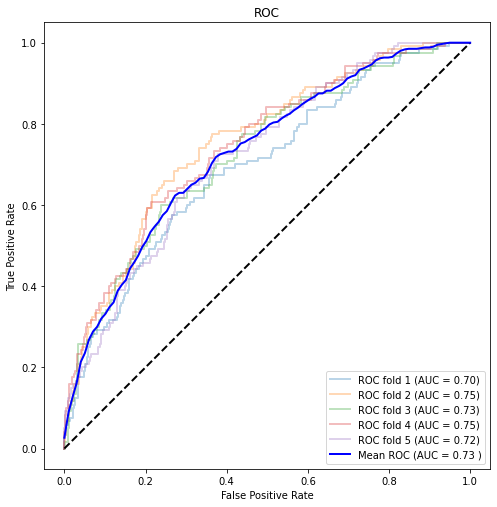


Scores for: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14,
                       max_features=40, min_samples_leaf=6, n_estimators=500,
                       random_state=42)


,Accuracy,AUC,Precision,Recall,F1
0,0.777120,0.695370,0.563636,0.258333,0.354286
1,0.778656,0.726619,0.568966,0.275000,0.370787
2,0.774704,0.721481,0.571429,0.200000,0.296296
3,0.783037,0.754823,0.625000,0.208333,0.312500
4,0.794466,0.747301,0.700000,0.233333,0.350000
mean,0.781597,0.729119,0.605806,0.235000,0.336774


In [11]:
pf.base_model(clf8, X, y, 0.2, 42)
pf.run_cross_val_model(clf8, X, y, cv)

scores = pf.cv_model_scores(clf8, X, y, cv, num)
model_scores = pd.concat([model_scores, scores], axis=1)
num += 1

In [12]:
model_scores_trans = model_scores.T
model_scores.T

,Accuracy,AUC,Precision,Recall,F1
Model 1,0.777643,0.716470,0.543744,0.211667,0.304341
Model 2,0.768166,0.717789,0.532313,0.193333,0.293953
Model 3,0.767778,0.718540,0.541003,0.200000,0.277372
Model 4,0.682454,0.725938,0.382426,0.651667,0.481173
Model 5,0.717614,0.696272,0.397456,0.496667,0.423294
Model 6,0.665105,0.683109,0.380535,0.636667,0.478021
Model 7,0.774883,0.721258,0.559829,0.201667,0.301789
Model 8,0.781597,0.729119,0.605806,0.235000,0.336774


,Idx,Importance,Feature
0,119,0.2750,cupcakes_cat_2
1,6,0.1334,caribbean_cat_1
2,120,0.1309,customcakes_cat_2
3,58,0.0571,japanese_cat_2
4,64,0.0549,pastashops_cat_2
5,43,0.0418,beerbar_cat_2
6,44,0.0351,breakfast_brunch_cat_2
7,93,0.0281,gluten_free_cat_3
8,74,0.0205,tradamerican_cat_2
9,7,0.0169,chinese_cat_1


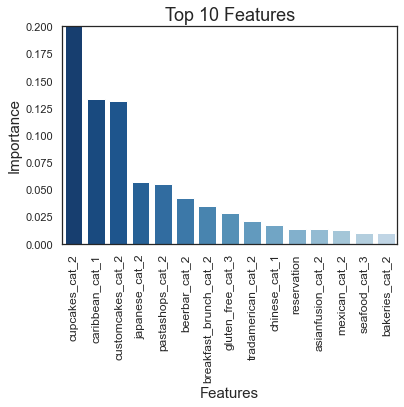

In [13]:
importances = clf8.feature_importances_
pf.feature_importance(clf8, importances, X)

## The Results
Of all the scores, precision is our most important metric. This is because the cost of false positives in our business case in greater than the cost of false negatives. A false negative may narrow the recommendation, but false positives could make the recommendations too broad and create a waste of resources.
![roc curve](Mod3-RestaurantProject/images/ROC.png)

### The Best Model
The best model was Model 8. This model was created using the original Random Forest Classifier, with the hyper parameters suggested by RandomSearchCV.

Based on the model and the EDA, I can make the following recommendations:

### Concept
The most important features the model identified were related to the restaurant categories. It seems bakeries,  Japanese restaurants, and Caribbean restaurants are high on the list. In addition, traditional American, diner, and breakfast places are also well represented. We also see that gluten-free appears among the top 15 features indicating that restaurants with more gluten-free items of any concept perform well. The presence of reservations on this list indicates that the sit-down concepts are more likely to have a high rating.       
![restaurants by category](Mod3-RestaurantProject/images/restaurant_by_category.png)
![restaurants by category](Mod3-RestaurantProject/images/top10.png)

### Location
* Above average restaurants seem to be clustered in certain neighborhoods, namely: These areas have medium population density. 
* Above average restaurants also have a high number of reviews. A higher amount of reviews suggests that more people are visiting that restaurant.
* This suggests that a there is an entourage effect — being in proximity to other restaurants with a high rating means more foot-traffic. More diners will also see your restaurant and might want to try yours.      
![maps](Mod3-RestaurantProject/images/maps.png)

### Price
* Price is an important feature due to perceived value. Finding the right price is about balancing costs with the quality of food that you want to provide. Developing a concept that has the right price should be gauged by the neighborhood. In both average and above average restaurants, price tiers two and three are over represented. However, in above average restaurants, price tier three appears more frequently than in restaurants that are not above average. This suggests that customers still perceive more expensive food as being worth the money sometimes. This indicates that it might be a good idea to do further research with menu scraping to determine what price point is most appropriate based on neighborhood and concept.       
![restaurants by category](Mod3-RestaurantProject/images/Restaurant_Price_Frequencies.png)


## Future Work
### Addressing the top two levels of the pyramid:
* Performing sentiment analysis to assess customer values as well as positive and negative experiences.
* Obtaining additional data to find broader trends to make more precise recommendations.
* Obtaining additional data to explore options that encourage brand loyalty.

### Assessing the impact of Covid-19:
* Collecting data regarding patterns in consumer habits during the times of Covid-19.
* Using time-series to predict how these patterns will evolve going forward.
